In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') # For better style

from notebook.services.config import ConfigManager
cm = ConfigManager()

cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

df = pd.read_excel('dataset_new.xlsx')

# also should loop thru and de-capitalize all the labels...

def fixBinaries():
    for col in df:
        if df[col][0] == 'Yes' or df[col][0] == 'No':
            # Yes == 1, No == 0
            df[col] = pd.Series(np.where(df[col].values == 'Yes', 1, 0),df.index)
            
fixBinaries()

# print( df.code )
# print( df.gvtdebtpc )
# print( df.bondrat2 )

# "A billion here, a billion there, and pretty soon you're talking real money"

## John Tomczak
## PSC 315: US Political Economy
## Professor Palmer
## Monday, May 17, 2021

# Executing a Balanced Budget

* 4 Stages of the Budget Process
* Monetary Sovereignty
* Accounting 101
* "BBE"

# States and Their Budget Policies

How many do not have BBE provisions?

In [7]:
print( df.balbudget.value_counts()[0] )

9


Who are these non-BBE states? Notice any patterns?

In [8]:
print( df.loc[df['balbudget'] == 0].state )

4       California
6      Connecticut
12        Illinois
13         Indiana
17       Louisiana
21        Michigan
37    Rhode Island
43         Vermont
47       Wisconsin
Name: state, dtype: object


# State Debt Per Capita

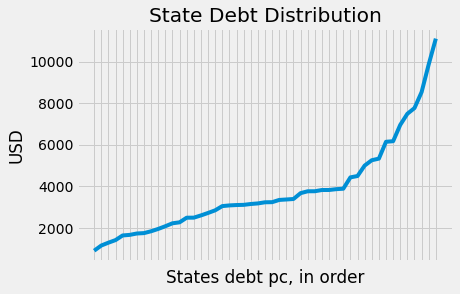

In [9]:
df.sort_values(by=['gvtdebtpc'], inplace=True)

fig, ax = plt.subplots(1)
ax.plot( df.code, df.gvtdebtpc )
ax.set_title( "State Debt Distribution")
ax.set_xlabel("States debt pc, in order")
ax.set_ylabel("USD")
ax.set_xticklabels([])
plt.show()

# Is There A Relationship?

Non-executed states are all in the top 50%, but not dominant

NB: two different slopes (visually)

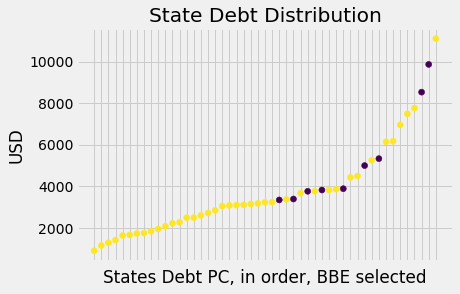

In [11]:
fig, ax = plt.subplots(1)
ax.scatter( df.code, df.gvtdebtpc, c=df.balbudget )
# ax.scatter( df.code, df.gvtdebtpc, c=df.bondrat2 )
ax.set_title( "State Debt Distribution")
ax.set_xlabel("States Debt PC, in order, BBE selected")
ax.set_ylabel("USD")
ax.set_xticklabels([])
plt.show()

# print( "No BBE: " + str((df.loc[df.balbudget==0].gvtdebtpc).mean().round()) )
# print( "Yes BBE: " + str((df.loc[df.balbudget==1].gvtdebtpc).mean().round()) )

Another view - not exceptionally compelling

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter( df.balbudget, df.gvtdebtpc )
ax.set_title( "State Debt Distribution")
ax.set_xlabel( "No BBE --- Yes BBE" )
ax.set_ylabel( "USD" )
ax.set_xticklabels([])
plt.show()

# Does Party Control Affect Debt?

## Percentage of years with Rep governor (1999-2019)

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.repgov, df.gvtdebtpc, c=df.balbudget )
axs.set_title( "GOP Governor" )
axs.set_ylabel( "State Debt PC" )
axs.set_xlabel( "GOP Control of Governorship" )

## Average GOP % of GOP-Dem presidential vote total from 2008-20

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.rep2pty, df.gvtdebtpc, c=df.balbudget )
axs.set_title( "GOP President" )
axs.set_ylabel( "State Debt PC" )
axs.set_xlabel( "GOP Share of State's R-D Presidential Votes" )

## Percentage of years from 1999-2019 with GOP control of both houses of the state leg

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.repleg, df.gvtdebtpc, c=df.balbudget )
axs.set_title( "GOP Leg" )
axs.set_ylabel( "State Debt PC" )
axs.set_xlabel( "GOP Control of Both Leg Houses" )

## Percentage of years from 1999-2019 with Dem control of both houses of the state leg

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.demleg, df.gvtdebtpc, c=df.balbudget )
axs.set_ylabel( "State Debt PC" )
axs.set_title( "Dem Leg" )
axs.set_xlabel( "Dem Control of Both Leg Houses" )

# Correlation between BBE And Party Control?

## GOP Governor Control

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.balbudget, df.repgov )
axs.set_title( "Correlation with GOP Governor Control" )
axs.set_ylabel( "GOP Governor Control" )
axs.set_xlabel( "No BBE --- Yes BBE" )

## GOP Presidential Votes

In [ ]:
fig, ax = plt.subplots( 1 )
ax.scatter( df.balbudget, df.rep2pty )
ax.set_title( "Correlation with GOP President Votes" )
ax.set_ylabel( "GOP Presidential Vote Share" )
ax.set_xlabel( "No BBE --- Yes BBE" )
plt.show()

print( "No BBE: " + str((df.loc[df.balbudget==0].rep2pty).mean().round()) )
print( "Yes BBE: " + str((df.loc[df.balbudget==1].rep2pty).mean().round()) )

## GOP Leg Control

No BBE is fairly competitive

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.balbudget, df.repleg )
axs.set_title( "Correlation with GOP Leg" )
axs.set_ylabel( "GOP control of leg, 1999-2019" )
axs.set_xlabel( "No BBE --- Yes BBE" )

## Dem Leg Control

No BBE slightly polarizes

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.balbudget, df.demleg )
axs.set_title( "Correlation with Dem Leg" )
axs.set_ylabel( "Dem control of leg, 1999-2019" )
axs.set_xlabel( "No BBE --- Yes BBE" )

# Fun: BBE and Population Growth

I do not mean to argue that one has an effect on another, but I think it looks cool nonetheless.

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.balbudget, df.popgrow )
axs.set_title( "States without Exec Laws Are Growing Slower" )
axs.set_ylabel( "Population Growth" )
axs.set_xlabel( "No BBE --- Yes BBE" )

# Fun: Right to Work and State Debt
Appears to be a common outcome of GOP control across a state

In [ ]:
fig, axs = plt.subplots( 1 )
axs.scatter( df.r2work, df.gvtdebtpc )
axs.set_title( "States with Rights to Work Have Lower Debt" )
axs.set_ylabel( "State Debt PC" )
axs.set_xlabel( "No Right to Work --- Yes Right to Work" )

# Fun: State Debt and BBE versus Credit Rating

Very little consistency

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter( df.gvtdebtpc, df.bondrat2, c=df.balbudget )
ax.set_title( "State Debt Distribution")
ax.set_xlabel("States debt pc, in order, non-exec selected")
ax.set_ylabel("Credit Rating (0 = lowest)")
ax.set_xticklabels([])
plt.show()

print( "No BBE: " + str((df.loc[df.balbudget==0].bondrat2).mean().round()) )
print( "Yes BBE: " + str((df.loc[df.balbudget==1].bondrat2).mean().round()) )

# Fun: State Spending and BBE

State spending is fairly similar regardless of BBE

In [ ]:
fig, ax = plt.subplots(1)
ax.scatter( df.balbudget, df.gvtspend )
ax.set_title( "State Spending Distribution, by BBE")
ax.set_xlabel( "No BBE --- Yes BBE" )
ax.set_ylabel("State Spending")
ax.set_xticklabels([])
plt.show()

print( "No BBE: " + str((df.loc[df.balbudget==0].gvtspend).mean().round()) )
print( "Yes BBE: " + str((df.loc[df.balbudget==1].gvtspend).mean().round()) )

# Findings

Tax Policy Center asserts that stronger BBR is associated with:
* "reduced spending" - found to be roughly equal, skewed towards reduced
* "less debt"
* "lower borrowing costs" (nb - largely a function of credit rating)

This research finds tentative support for these claims (others untested), though not such that notable conclusions can be drawn. 

# Findings, Continued

This research finds the following to be drivers of state debt levels:
* Competitive gubernatorial races
* Democratic Presidential voting
* Lack of GOP dominance in state leg
* Democratic dominance in state leg


I do believe more work would need to be done in categorizing the complexities of each state's budget processes, further than simply "balanced as executed" or not. 